In [1]:
# PYTHON - PROJECT 1 -  ANZHELA CHANYSHEVA

# STEP 1. I import the core Python libraries used for data analysis
# and also set some display options.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

In [2]:
# STEP 2. I load the dataset into a Pandas DataFrame using pd.read_csv.
# I use df.head() to display the first rows of the dataset and understand
# what columns exist,what type of information the dataset contains, and whether
# the data loaded correctly.

df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [3]:
# STEP 3. I inspect the basic structure of the dataset. I use df.info() to check
# the structure of the dataset, to understand how many rows and columns, data
# types, and missing values.

print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (212331, 15)

Column names:
Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Test

,Year,Total Tested
count,"212,331.00","212,331.00"
mean,"2,015.96",49.36
std,0.80,93.02
min,"2,015.00",1.00
25%,"2,015.00",5.00
50%,"2,016.00",20.00
75%,"2,017.00",57.00
max,"2,017.00","1,729.00"


In [4]:
# I want to see all columns and all cell values, including NaN,in order to identify
# missing data,strange strings or inconsistent categories and I do it before
#perform data cleanig.

df.describe(include='all')

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331,212331,212331,212321,"212,331.00","212,331.00",212331,212331,212331,212331,212331,212331,212331,212331,212331
unique,1018,1012,6,14,NaN,NaN,748,446,992,945,992,744,1000,707,999
top,26Q430,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,NaN,NaN,s,s,s,s,s,s,s,na,na
freq,490,1337,151160,29254,NaN,NaN,75222,75222,75222,75222,75222,75222,75222,142680,142680
mean,NaN,NaN,NaN,NaN,"2,015.96",49.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.80,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,"2,015.00",1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,015.00",5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,016.00",20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017.00",57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# According to the statistical analysis, the standart deviation (std) is high
# for "Total Tested" (about 93). I check unique values of Total Tested to analyze it.
# Schools vary significantly in size and the number of students taking the test.

df['Total Tested'].unique()
#df['Total Tested'].unique()[:20]

array([  4,  16,   9, ..., 935, 679, 951])

In [6]:
# I use len() to check the number of unique schools in the dataset.

unique_schools = df["School Name"].unique()
len(unique_schools)

1012

In [8]:
# I check the frequency of 'Year'

df['Year'].value_counts()

,count
Year,
2016,76123
2015,72768
2017,63440


In [10]:
# I check the frequency of 'Total Tested'

df['Total Tested'].value_counts()

,count
Total Tested,
1,22010
2,12750
3,9168
4,7264
5,6263
...,...
940,1
964,1
915,1


In [11]:
# I check the frequency of 'School Level'

df['School Level'].value_counts()

,count
School Level,
High school,151160
Secondary School,30252
Junior High-Intermediate-Middle,15742
K-12 all grades,8294
K-8,6858
Elementary,25


In [12]:
# I check the frequency of 'School Level'

df['Regents Exam'].value_counts()

,count
Regents Exam,
Common Core Algebra,29254
Living Environment,25539
U.S. History and Government,20426
Common Core English,19878
Global History and Geography,19192
Physical Settings/Earth Science,15971
Common Core Geometry,15267
Physical Settings/Chemistry,11670
English,11091


In [13]:
# STEP 4. I check missing values and unique values.
# df.isna().sum() returns the number of missing values in each columns.
# df.isna().mean())*100 calculates the percentage of missing values in each columns.
# df.nunique() returns the number of unique values in each column.

print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

Percentage of missing values per column:
School DBN                    0.00
School Name                   0.00
School Level                  0.00
Regents Exam                  0.00
Year                          0.00
Total Tested                  0.00
Mean Score                    0.00
Number Scoring Below 65       0.00
Percent Scoring Below 65      0.00
Number Scoring 65 or Above    0.00
Percent Scoring 65 or Above   0.00
Number Scoring 80 or Ab

<Axes: >

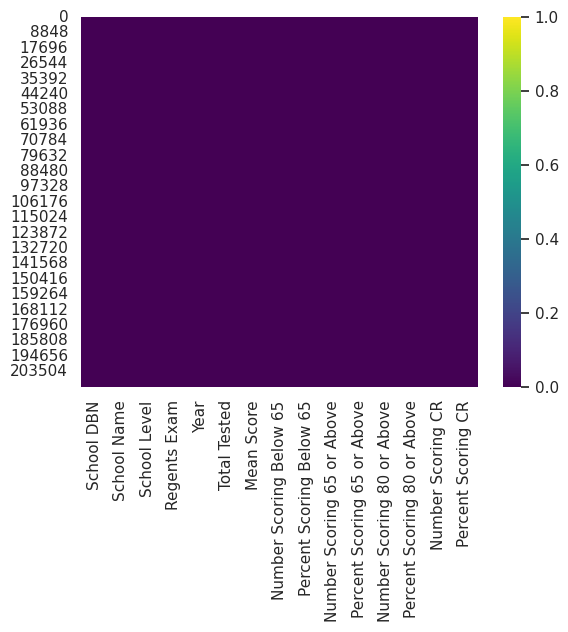

In [14]:
# I create a heatmap of missing values. Dark colors represents missing values(NaN).

sns.heatmap(df.isnull(), cbar=True,
cmap='viridis')

In [15]:
# STEP 5. Basic data cleaning.
# 1. Clean column names (lowercase, replace spaces with underscores).

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

In [16]:
# Inspect unique values in Total Tested
df['total_tested'].unique()[:20]

array([ 4, 16,  9,  3,  2, 15, 49, 51, 55, 23, 22, 20,  1, 17,  5, 12, 50,
       53,  6, 34])

In [17]:
# STEP 6. Change datatypes to category (School DBN, School Name, School Level, Regents Exam)

df['school_dbn'] = df['school_dbn'].astype('category')
df['school_name'] = df['school_name'].astype('category')
df['school_level'] = df['school_level'].astype('category')
df['regents_exam'] = df['regents_exam'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   school_dbn                   212331 non-null  category
 1   school_name                  212331 non-null  category
 2   school_level                 212331 non-null  category
 3   regents_exam                 212321 non-null  category
 4   year                         212331 non-null  int64   
 5   total_tested                 212331 non-null  int64   
 6   mean_score                   212331 non-null  object  
 7   number_scoring_below_65      212331 non-null  object  
 8   percent_scoring_below_65     212331 non-null  object  
 9   number_scoring_65_or_above   212331 non-null  object  
 10  percent_scoring_65_or_above  212331 non-null  object  
 11  number_scoring_80_or_above   212331 non-null  object  
 12  percent_scoring_80_or_above  212331 non-null

In [18]:
# STEP 7. Change datatypes to numeric (Mean Score, Number Scoring below 65, Percent Scoring below 65,
# Number Scoring 65 or Above, ...., Percent Scoring CR)

df['mean_score'] = pd.to_numeric(df['mean_score'], errors='coerce')
df['number_scoring_below_65'] = pd.to_numeric(df['number_scoring_below_65'], errors='coerce')
df['percent_scoring_below_65'] = pd.to_numeric(df['percent_scoring_below_65'], errors='coerce')
df['number_scoring_65_or_above'] = pd.to_numeric(df['number_scoring_65_or_above'], errors='coerce')
df['percent_scoring_65_or_above'] = pd.to_numeric(df['percent_scoring_65_or_above'], errors='coerce')
df['number_scoring_80_or_above'] = pd.to_numeric(df['number_scoring_80_or_above'], errors='coerce')
df['percent_scoring_80_or_above'] = pd.to_numeric(df['percent_scoring_80_or_above'], errors='coerce')
df['number_scoring_cr'] = pd.to_numeric(df['number_scoring_cr'], errors='coerce')
df['percent_scoring_cr'] = pd.to_numeric(df['percent_scoring_cr'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   school_dbn                   212331 non-null  category
 1   school_name                  212331 non-null  category
 2   school_level                 212331 non-null  category
 3   regents_exam                 212321 non-null  category
 4   year                         212331 non-null  int64   
 5   total_tested                 212331 non-null  int64   
 6   mean_score                   137109 non-null  float64 
 7   number_scoring_below_65      137109 non-null  float64 
 8   percent_scoring_below_65     137109 non-null  float64 
 9   number_scoring_65_or_above   137109 non-null  float64 
 10  percent_scoring_65_or_above  137109 non-null  float64 
 11  number_scoring_80_or_above   137109 non-null  float64 
 12  percent_scoring_80_or_above  137109 non-null

In [19]:
# Check missing values again
df.isna().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,10
year,0
total_tested,0
mean_score,75222
number_scoring_below_65,75222
percent_scoring_below_65,75222
number_scoring_65_or_above,75222


In [20]:
# STEP 8. I imput missing numeric values with the median, which is robust to outliers.

mean_score_median = df['mean_score'].median()
df['mean_score'] = df['mean_score'].fillna(mean_score_median)
number_scoring_below_65_median = df['number_scoring_below_65'].median()
df['number_scoring_below_65'] = df['number_scoring_below_65'].fillna(number_scoring_below_65_median)
percent_scoring_below_65_median = df['percent_scoring_below_65'].median()
df['percent_scoring_below_65'] = df['percent_scoring_below_65'].fillna(percent_scoring_below_65_median)
number_scoring_65_or_above_median = df['number_scoring_65_or_above'].median()
df['number_scoring_65_or_above'] = df['number_scoring_65_or_above'].fillna(number_scoring_65_or_above_median)
percent_scoring_65_or_above_median = df['percent_scoring_65_or_above'].median()
df['percent_scoring_65_or_above'] = df['percent_scoring_65_or_above'].fillna(percent_scoring_65_or_above_median)
number_scoring_80_or_above_median = df['number_scoring_80_or_above'].median()
df['number_scoring_80_or_above'] = df['number_scoring_80_or_above'].fillna(number_scoring_80_or_above_median)
percent_scoring_80_or_above_median = df['percent_scoring_80_or_above'].median()
df['percent_scoring_80_or_above'] = df['percent_scoring_80_or_above'].fillna(percent_scoring_80_or_above_median)
number_scoring_cr_median = df['number_scoring_cr'].median()
df['number_scoring_cr'] = df['number_scoring_cr'].fillna(number_scoring_cr_median)
percent_scoring_cr_median = df['percent_scoring_cr'].median()
df['percent_scoring_cr'] = df['percent_scoring_cr'].fillna(percent_scoring_cr_median)
df.isna().sum()


,0
school_dbn,0
school_name,0
school_level,0
regents_exam,10
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [24]:
# I choose Landmark High School

Landmark = df[df['school_name'] == 'Landmark High School'].copy()

Landmark.describe()

#Landmark.head(10)


,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,"2,015.94",21.45,68.32,10.24,29.64,27.47,70.36,8.45,19.80,13.92,35.33
std,0.70,25.77,4.16,4.36,14.01,15.77,14.01,7.47,13.09,10.10,12.20
min,"2,015.00",1.00,56.50,0.00,0.00,4.00,36.40,0.00,0.00,0.00,0.00
25%,"2,015.00",2.00,65.40,7.00,15.50,21.00,59.80,5.00,12.50,9.00,29.00
50%,"2,016.00",7.50,65.40,13.00,40.20,21.00,59.80,5.00,12.50,9.00,29.00
75%,"2,016.00",41.75,71.35,13.00,40.20,35.75,84.50,9.00,28.60,19.50,44.65
max,"2,017.00",98.00,77.80,19.00,63.60,79.00,100.00,36.00,50.00,44.00,60.40


In [25]:
# Descriptive statistics - Numeric columns

numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.describe()

,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
count,"212,331.00","212,331.00","212,331.00","212,331.00","212,331.00","212,331.00","212,331.00","212,331.00","212,331.00","212,331.00","212,331.00"
mean,"2,015.96",49.36,65.79,20.84,41.32,37.43,58.68,15.01,19.08,15.88,31.37
std,0.80,93.02,9.08,30.42,22.84,69.53,22.84,45.85,21.58,40.34,18.13
min,"2,015.00",1.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,015.00",5.00,62.40,9.00,30.00,14.00,50.00,2.00,7.10,9.00,29.00
50%,"2,016.00",20.00,65.40,13.00,40.20,21.00,59.80,5.00,12.50,9.00,29.00
75%,"2,017.00",57.00,68.70,19.00,50.00,32.00,70.00,9.00,20.00,9.00,29.00
max,"2,017.00","1,729.00",98.70,697.00,100.00,"1,607.00",100.00,"1,365.00",100.00,"1,465.00",100.00


In [27]:
print('Total Tested summary:')
print(df['total_tested'].describe())

print('\nMean Score summary:')
print(df['mean_score'].describe())

print('\nNumber Scoring Below 65 summary:')
print(df['number_scoring_below_65'].describe())

print('\nPercent Scoring Below 65 summary:')
print(df['percent_scoring_below_65'].describe())



Total Tested summary:
count   212,331.00
mean         49.36
std          93.02
min           1.00
25%           5.00
50%          20.00
75%          57.00
max       1,729.00
Name: total_tested, dtype: float64

Mean Score summary:
count   212,331.00
mean         65.79
std           9.08
min          15.00
25%          62.40
50%          65.40
75%          68.70
max          98.70
Name: mean_score, dtype: float64

Number Scoring Below 65 summary:
count   212,331.00
mean         20.84
std          30.42
min           0.00
25%           9.00
50%          13.00
75%          19.00
max         697.00
Name: number_scoring_below_65, dtype: float64

Percent Scoring Below 65 summary:
count   212,331.00
mean         41.32
std          22.84
min           0.00
25%          30.00
50%          40.20
75%          50.00
max         100.00
Name: percent_scoring_below_65, dtype: float64


In [29]:
# STEP 9. Descriptive statistics - categorical columns

def show_category_distribution(col_name):
    counts = df[col_name].value_counts()
    percents = df[col_name].value_counts(normalize=True) * 100
    display(pd.DataFrame({'count': counts, 'percent': percents.round(2)}))

for col in ['school_name','school_level', 'regents_exam','year','total_tested','mean_score','number_scoring_below_65', 'percent_scoring_below_65', 'number_scoring_65_or_above', 'percent_scoring_65_or_above', 'number_scoring_80_or_above',
'percent_scoring_80_or_above','number_scoring_cr', 'percent_scoring_cr']:

    print(f'--- {col} ---')

    show_category_distribution(col)

    print()

--- school_name ---


,count,percent
school_name,,
New Visions Charter High School for Advanced Math,1337,0.63
New Visions Charter High School for the Humanities,1031,0.49
James Madison High School,490,0.23
Francis Lewis High School,490,0.23
Long Island City High School,489,0.23
...,...,...
Success Academy Charter School - Harlem 3,5,0.00
P.S. 202 Ernest S. Jenkyns,5,0.00
Explore Excel Charter School,5,0.00



--- school_level ---


,count,percent
school_level,,
High school,151160,71.19
Secondary School,30252,14.25
Junior High-Intermediate-Middle,15742,7.41
K-12 all grades,8294,3.91
K-8,6858,3.23
Elementary,25,0.01



--- regents_exam ---


,count,percent
regents_exam,,
Common Core Algebra,29254,13.78
Living Environment,25539,12.03
U.S. History and Government,20426,9.62
Common Core English,19878,9.36
Global History and Geography,19192,9.04
Physical Settings/Earth Science,15971,7.52
Common Core Geometry,15267,7.19
Physical Settings/Chemistry,11670,5.50
English,11091,5.22



--- year ---


,count,percent
year,,
2016,76123,35.85
2015,72768,34.27
2017,63440,29.88



--- total_tested ---


,count,percent
total_tested,,
1,22010,10.37
2,12750,6.00
3,9168,4.32
4,7264,3.42
5,6263,2.95
...,...,...
940,1,0.00
964,1,0.00
915,1,0.00



--- mean_score ---


,count,percent
mean_score,,
65.40,75747,35.67
64.30,555,0.26
63.30,555,0.26
62.30,552,0.26
63.80,550,0.26
...,...,...
97.80,1,0.00
98.00,1,0.00
98.70,1,0.00



--- number_scoring_below_65 ---


,count,percent
number_scoring_below_65,,
13.00,78341,36.90
0.00,10252,4.83
1.00,5978,2.82
6.00,5493,2.59
5.00,5386,2.54
...,...,...
361.00,1,0.00
483.00,1,0.00
453.00,1,0.00



--- percent_scoring_below_65 ---


,count,percent
percent_scoring_below_65,,
40.20,75296,35.46
0.00,10252,4.83
100.00,3330,1.57
50.00,2889,1.36
66.70,1974,0.93
...,...,...
91.60,2,0.00
95.40,2,0.00
98.80,2,0.00



--- number_scoring_65_or_above ---


,count,percent
number_scoring_65_or_above,,
21.00,76943,36.24
6.00,4684,2.21
4.00,4459,2.10
3.00,4343,2.05
5.00,4332,2.04
...,...,...
"1,076.00",1,0.00
825.00,1,0.00
807.00,1,0.00



--- percent_scoring_65_or_above ---


,count,percent
percent_scoring_65_or_above,,
59.80,75296,35.46
100.00,10252,4.83
0.00,3330,1.57
50.00,2889,1.36
33.30,1974,0.93
...,...,...
1.00,2,0.00
25.10,2,0.00
4.60,2,0.00



--- number_scoring_80_or_above ---


,count,percent
number_scoring_80_or_above,,
5.00,80102,37.73
0.00,29996,14.13
1.00,14522,6.84
2.00,9656,4.55
3.00,7434,3.50
...,...,...
778.00,1,0.00
546.00,1,0.00
736.00,1,0.00



--- percent_scoring_80_or_above ---


,count,percent
percent_scoring_80_or_above,,
12.50,76453,36.01
0.00,29996,14.13
100.00,1524,0.72
16.70,1484,0.70
14.30,1324,0.62
...,...,...
50.10,3,0.00
83.40,2,0.00
49.90,2,0.00



--- number_scoring_cr ---


,count,percent
number_scoring_cr,,
9.00,144258,67.94
0.00,9076,4.27
1.00,5640,2.66
2.00,4152,1.96
3.00,3363,1.58
...,...,...
523.00,1,0.00
"1,295.00",1,0.00
"1,327.00",1,0.00



--- percent_scoring_cr ---


,count,percent
percent_scoring_cr,,
29.00,142728,67.22
0.00,9076,4.27
100.00,2799,1.32
50.00,1000,0.47
33.30,897,0.42
...,...,...
91.60,3,0.00
66.60,2,0.00
33.40,2,0.00


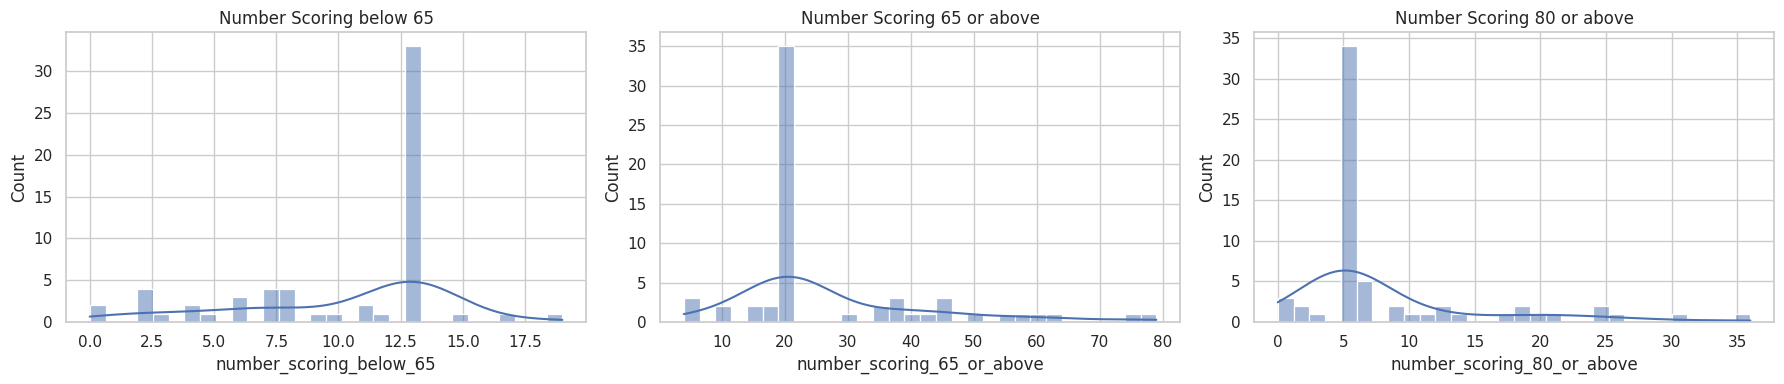

In [35]:
# STEP 10. Histogram

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(Landmark['number_scoring_below_65'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Number Scoring below 65')

sns.histplot(Landmark['number_scoring_65_or_above'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Number Scoring 65 or above')

sns.histplot(Landmark['number_scoring_80_or_above'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Number Scoring 80 or above')

plt.tight_layout()
plt.show()

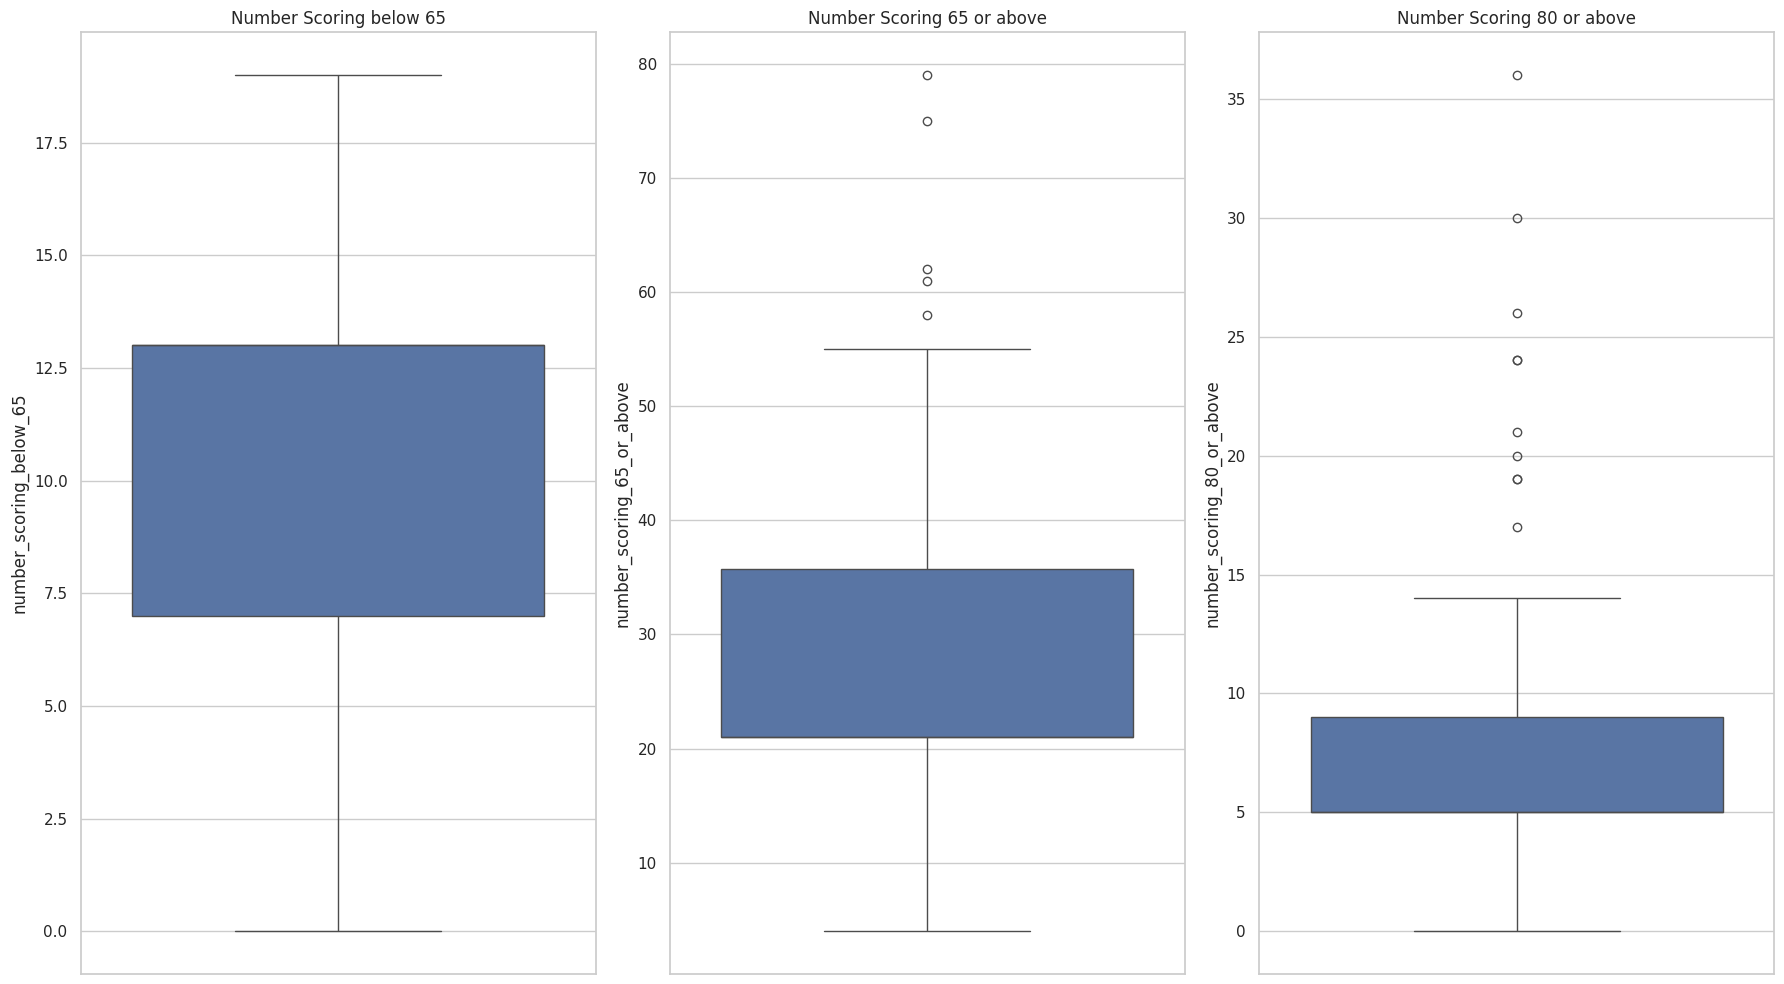

In [36]:
# STEP 11.  Boxplot.

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

sns.boxplot(y=Landmark['number_scoring_below_65'], ax=axes[0])
axes[0].set_title('Number Scoring below 65')

sns.boxplot(y=Landmark['number_scoring_65_or_above'], ax=axes[1])
axes[1].set_title('Number Scoring 65 or above')

sns.boxplot(y=Landmark['number_scoring_80_or_above'], ax=axes[2])
axes[2].set_title('Number Scoring 80 or above')


plt.tight_layout()
plt.show()


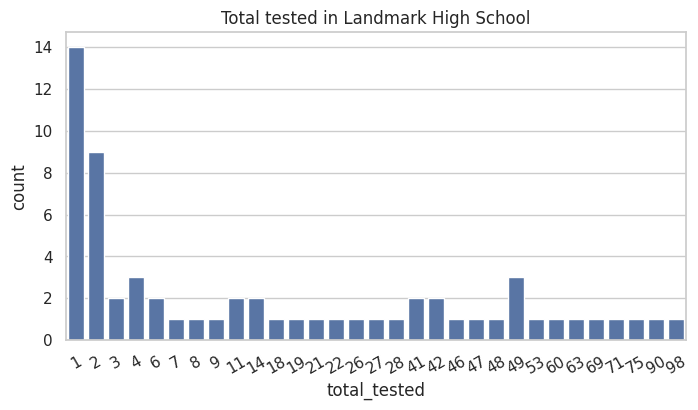

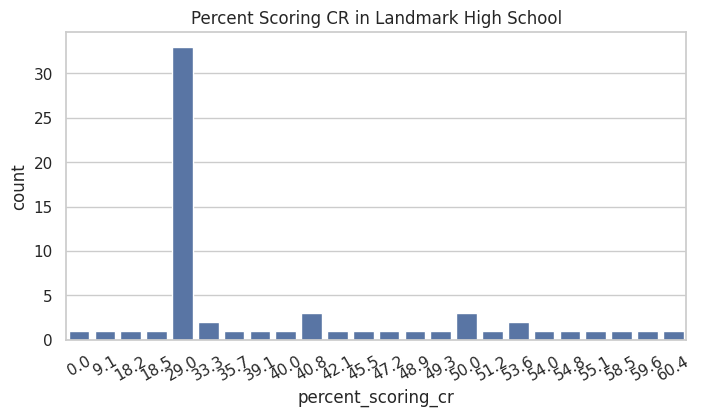

In [51]:
# Categorical visualization

plt.figure(figsize=(8, 4))
sns.countplot(x='total_tested', data=Landmark)
plt.title('Total tested in Landmark High School')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='percent_scoring_cr', data=Landmark)
plt.title('Percent Scoring CR in Landmark High School')
plt.xticks(rotation=30)
plt.show()

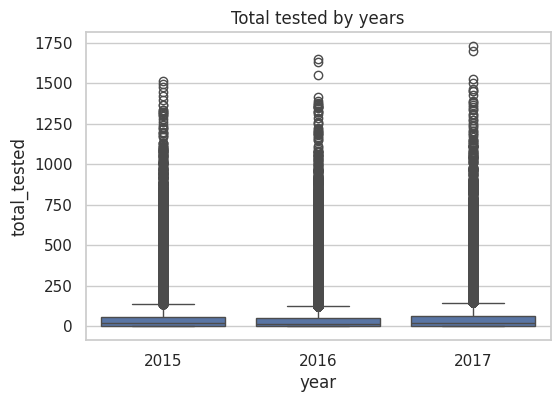

In [41]:
# Total tested by years

plt.figure(figsize=(6, 4))
sns.boxplot(x='year', y='total_tested', data=df)
plt.title('Total tested by years')
plt.show()

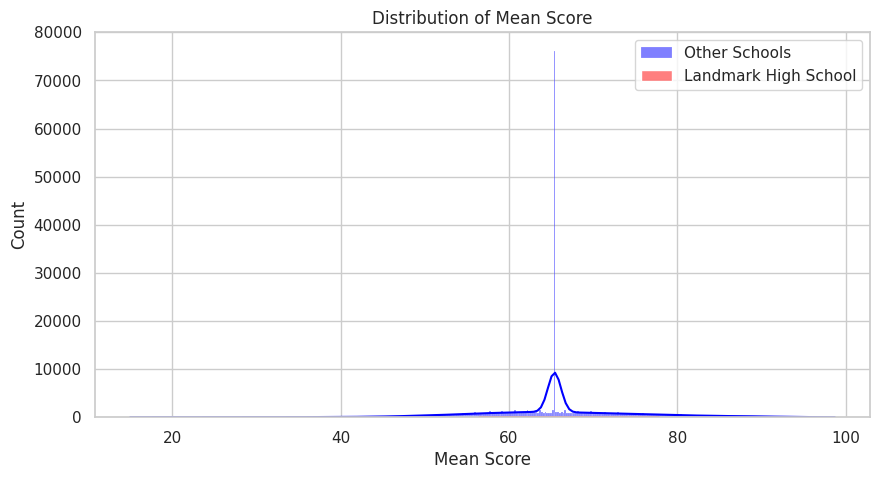

/tmp/ipython-input-3944575793.py:25: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[others['mean_score'], landmark['mean_score']],


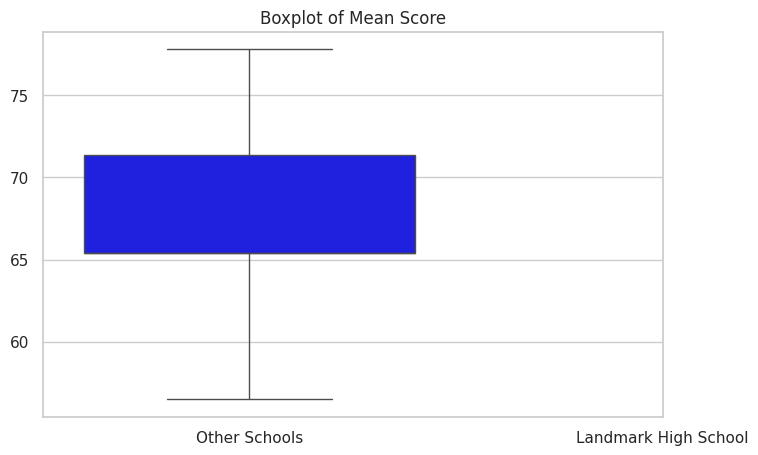

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter selected school

school_name = "Landmark High School"
landmark = df[df['school_name'] == school_name]
others = df[df['school_name'] != school_name]

# 1. Histogram (histplot) ,mean_score

plt.figure(figsize=(10,5))
sns.histplot(others['mean_score'], color='blue', label='Other Schools', kde=True)
sns.histplot(landmark['mean_score'], color='red', label=school_name, kde=True)
plt.title('Distribution of Mean Score')
plt.xlabel('Mean Score')
plt.ylabel('Count')
plt.legend()
plt.show()

# 2. Boxplot, mean_score

plt.figure(figsize=(8,5))
sns.boxplot(data=[others['mean_score'], landmark['mean_score']],
            palette=['blue','red'])
plt.xticks([0,1], ['Other Schools', school_name])
plt.title('Boxplot of Mean Score')
plt.show()

In [ ]:
#The analysis shows that Landmark High School has higher mean scores compare to other schools in the dataset.
#This trend is consistent across multiple years and different types of number scoring.